## test_methods.py

In [2]:
"""
test_method.py connected to test_method.ipynb 
via "jupytext" light pairing.

Example: ostat
============= 
template.class_type = "micro_canonical_discrete_distinguihable"
template.__init__()
template.verbose = False
[mu,B] = symbols('mu B', real=True)
xreplaces = {g:1, engF:mu*B*(2*i-3), j:1, n:2}

# 4 lines
commands = ["xreplace", "ostat.Zsp", xreplaces]
template.process(commands)
Zsp = simplify(template.result.doit())
display(Zsp)

# Deep copy to create new instances of obranch class.
import copy
ostat2 = copy.deepcopy(ostat)
"""
import copy
import sys
import os
lstPaths = ["../src"]
for ipath in lstPaths:
    if ipath not in sys.path:
        sys.path.append(ipath) 
from sympy import *
from sympy.abc import *
from sympy.vector import CoordSys3D
from libsympy import *
from methods import *
# Execute jupyter-notebook related commands.
#exec(open('libnotebook.py').read())
print(sys.version); print(sys.path)

3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
['/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/yubuntu/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.8/dist-packages', '../src', '../../libpython/src']


### Settings

In [37]:
### Settings
class sets:
    """
    Setttings class.
        
    Instead of settings class, settings nametuble might be used.
    Settings = namedtuple("Settings", "type dropinf delta")
    sets = Settings(type="symbolic", dropinf=True, delta=0.1)
    """
    global dictflow, test_all
    
    def __init__(self):
        pass
    
    # File settings
    input_dir  = "input/mechanics"
    output_dir = "output/mechanics"
    
    # Plotting settings
    plot_time_scale = {1:"xy", 2:"xz", 3:"yz"}[3]
    
    # Execution settings.
    test_all = {0:False, 1:True}[1]
    dictflow = dict(
        examples = {13:"e1.3",14:"e1.4",15:"e1.5",16:"e1.6",17:"vector_products"},
        problems = {13:"p1.3"})
    flow = [dictflow["examples"][i] for i in [17]]
    if test_all: flow = flatten([list(dictflow[i].values()) for i in dictflow.keys()])

global C
C = CoordSys3D('C')
[x, y, z] = [C.x, C.y, C.z] # x^, y^, z^ vectors.    

In [38]:
print("Test of the {0}.".format(sets.flow))

Test of the ['e1.3', 'e1.4', 'e1.5', 'e1.6', 'vector_products', 'p1.3'].


### get_formulary

In [ ]:
### get_formulary
if "get_formulary" in sets.flow:
#    omech = mechanics() # DO NOT create any instance.
    ometh.__init__()
    ometh.get_formulary()
    ometh.get_formulary(style="eq")

### get_subformulary

In [ ]:
if "get_subformulary" in sets.flow:
    ometh.__init__()
    ometh.get_subformulary()    

### Triple Vector Product

'(A x B) x C='

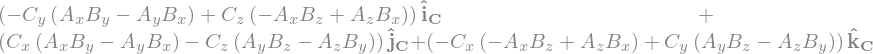

'A x (B x C)='

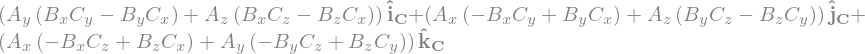

'lhs.equals(rhs)'

None

'simplify(lhs-rhs)'

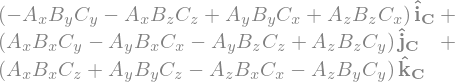

'xreplace ometh.dot_product {A_x: 3, A_y: 3, A_z: 3, B_x: 3, B_y: 3, B_z: 3, C_x: C_x, C_y: C_y, C_z: C_z}'

Eq(C, A_x*B_x + A_y*B_y + A_z*B_z)(xreplace, {A_x: 3, A_y: 3, A_z: 3, B_x: 3, B_y: 3, B_z: 3, C_x: C_x, C_y: C_y, C_z: C_z})


'A= 3*C.i + 3*C.j + 3*C.k'

'B= 3*C.i + 3*C.j + 3*C.k'

'Dot Product'

'Vector Product'

In [36]:
if "vector_products" in sets.flow:
    """
    # (A x B) x C =! A x (B x C)
    [Ax,Bx,Cx] = symbols('A_x B_x C_x', real=True)
    [Ay,By,Cy] = symbols('A_y B_y C_y', real=True)
    [Az,Bz,Cz] = symbols('A_z B_z C_z', real=True)
    
    C = CoordSys3D('C')
    A = Ax*C.i + Ay*C.j + Az*C.k
    B = Bx*C.i + By*C.j + Bz*C.k 
    C = Cx*C.i + Cy*C.j + Cz*C.k
    lhs = A.cross(B).cross(C)
    rhs = A.cross(B.cross(C))
    print(simplify(lhs-rhs))
    print(lhs.equals(rhs))
    """
    ometh.__init__()
    ometh.verbose = True
    
    # 1. way
    vA,vB,vC = (ometh.vA, ometh.vB, ometh.vC)
    lhs = vA.cross(vB).cross(vC)
    rhs = vA.cross(vB.cross(vC))
    pprints("(A x B) x C=", lhs,
            "A x (B x C)=", rhs,
            "lhs.equals(rhs)", lhs.equals(rhs),
            "simplify(lhs-rhs)", simplify(lhs-rhs),
            output_style = {1:"display", 2:"pprint", 3:"print", 4:"latex"}[1],
            newline=True)
    
    # 2. Way
    vA = 3*C.i + 3*C.j + 3*C.k
    vB = 3*C.i + 3*C.j + 3*C.k
    xreplaces = {Ax:vA.components[C.i], Ay:vA.components[C.j], Az:vA.components[C.k],
                 Bx:vB.components[C.i], By:vB.components[C.j], Bz:vB.components[C.k],
                 Cx:vC.components[C.i], Cy:vC.components[C.j], Cz:vC.components[C.k]}
    commands = ["xreplace", "ometh.dot_product", xreplaces]
    ometh.process(commands)
    
    # 3. Way
    ometh.dot_product.evalf(subs=xreplaces)
    # 4. Way
    display(f"A= {vA}", f"B= {vB}",
            "Dot Product",
            ometh.dot_product,
            ometh.dot_product.xreplace(xreplaces),
            "Vector Product",
            ometh.cross_product.xreplace(xreplaces)
            )

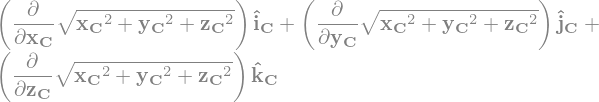

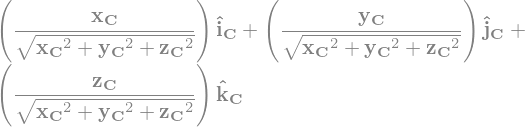

In [40]:
if "e1.3" in sets.flow:
    ometh.__init__()
    ometh.verbose = True
    
    r = Eq(S('rbold'), sqrt(x**2+y**2+z**2))
    gradr1 = gradient(r.rhs, doit=False)
    gradr2 = gradient(r.rhs)
    
    display(r,
            var(r'\nabla{\bf{r}}='), gradr1,
            var(r'\nabla{\bf{r}}='), gradr2)

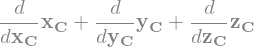

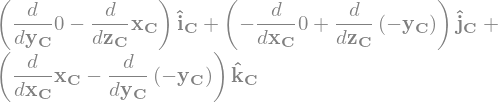

'e1.6'

'v='

'path='

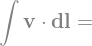

In [41]:
if "e1.4" in sets.flow:
    ometh.__init__()
    ometh.verbose = True
    
    r = Eq(S('r_x')*C.i+S('r_y')*C.j+S('r_z')*C.k,
           x*C.i + y*C.j + z*C.k)
    div1 = divergence(r.rhs, doit=False)
    div2 = divergence(r.rhs)
    
    display(r,
            var(r'\nabla\cdot{\bf{r}}='), div1,
            var(r'\nabla\cdot{\bf{r}}='), div2,
            )
#--- e1.5    
if "e1.5" in sets.flow:
    ometh.__init__()
    ometh.verbose = True
    
    r = Eq(S('r_x')*C.i+S('r_y')*C.j+S('r_z')*C.k,
           -y*C.i + x*C.j)
    curl1 = curl(r.rhs, doit=False)
    curl2 = curl(r.rhs)
    
    display(r,
            var(r'\nabla\times{\bf{r}}='), curl1,
            var(r'\nabla\times{\bf{r}}='), curl2,
            )
#--- e1.6    
if "e1.6" in sets.flow:
    ometh.__init__()
    ometh.verbose = True
    
    v = Eq(S('v_x')*C.i+S('v_y')*C.j+S('v_z')*C.k,
           y**2*C.i + 2*x*(y+1)*C.j)
    path = ParametricRegion((t, t), (t,1,2))
    integral = vector_integrate(v.rhs, path)
    
    display("e1.6",
            "v=", v,
            "path=", path,
            var(r'\int{\bf{v}\cdot{d\bf{l}}}='), integral)